In [3]:
import pandas as pd

df_symbols= pd.read_csv("/home/blockchain/Downloads/Stock market guvi project/Sector_data - Sheet1.csv")
df_symbols['Actual Symbol'] = df_symbols['Symbol'].str.split(": ").str[-1]
df_symbols

COMPANY           sector                          Symbol  \
0     ADANI ENTERPRISES    MISCELLANEOUS   ADANI ENTERPRISES: ADANIGREEN   
1     ADANI PORTS & SEZ    MISCELLANEOUS   ADANI PORTS & SEZ: ADANIPORTS   
2      APOLLO HOSPITALS    MISCELLANEOUS    APOLLO HOSPITALS: APOLLOHOSP   
3          ASIAN PAINTS           PAINTS        ASIAN PAINTS: ASIANPAINT   
4             AXIS BANK          BANKING             AXIS BANK: AXISBANK   
5            BAJAJ AUTO      AUTOMOBILES          BAJAJ AUTO: BAJAJ-AUTO   
6         BAJAJ FINANCE          FINANCE       BAJAJ FINANCE: BAJFINANCE   
7         BAJAJ FINSERV          FINANCE       BAJAJ FINSERV: BAJAJFINSV   
8    BHARAT ELECTRONICS          DEFENCE         BHARAT ELECTRONICS: BEL   
9         BHARTI AIRTEL          TELECOM           BHARTI AIRTEL: AIRTEL   
10                 BPCL           ENERGY                      BPCL: BPCL   
11                CIPLA  PHARMACEUTICALS                    CIPLA: CIPLA   
12           COAL INDIA           MINING           COAL INDIA: COALINDIA   
13       DR. REDDYS LAB  PHARMACEUTICALS         DR. REDDYS LAB: DRREDDY   
14        EICHER MOTORS      AUTOMOBILES        EICHER MOTORS: EICHERMOT   
15               GRASIM         TEXTILES                  GRASIM: GRASIM   
16     HCL TECHNOLOGIES         SOFTWARE       HCL TECHNOLOGIES: HCLTECH   
17            HDFC BANK          BANKING             HDFC BANK: HDFCBANK   
18  HDFC LIFE INSURANCE        INSURANCE   HDFC LIFE INSURANCE: HDFCLIFE   
19        HERO MOTOCORP      AUTOMOBILES       HERO MOTOCORP: HEROMOTOCO   
20             HINDALCO        ALUMINIUM              HINDALCO: HINDALCO   
21   HINDUSTAN UNILEVER             FMCG  HINDUSTAN UNILEVER: HINDUNILVR   
22           ICICI BANK          BANKING           ICICI BANK: ICICIBANK   
23        INDUSIND BANK          BANKING       INDUSIND BANK: INDUSINDBK   
24              INFOSYS         SOFTWARE                   INFOSYS: INFY   
25                  IOC           ENERGY                        IOC: IOC   
26                  ITC   FOOD & TOBACCO                        ITC: ITC   
27            JSW STEEL            STEEL             JSW STEEL: JSWSTEEL   
28  KOTAK MAHINDRA BANK          BANKING  KOTAK MAHINDRA BANK: KOTAKBANK   
29                  L&T      ENGINEERING                         L&T: LT   
30                  M&M      AUTOMOBILES                        M&M: M&M   
31        MARUTI SUZUKI      AUTOMOBILES           MARUTI SUZUKI: MARUTI   
32               NESTLE   FOOD & TOBACCO               NESTLE: NESTLEIND   
33                 NTPC            POWER                      NTPC: NTPC   
34                 ONGC           ENERGY                      ONGC: ONGC   
35           POWER GRID            POWER           POWER GRID: POWERGRID   
36        RELIANCE IND.           ENERGY         RELIANCE IND.: RELIANCE   
37                  SBI          BANKING                       SBI: SBIN   
38   SBI LIFE INSURANCE        INSURANCE     SBI LIFE INSURANCE: SBILIFE   
39      SHRIRAM FINANCE          FINANCE     SHRIRAM FINANCE: SHRIRAMFIN   
40           SUN PHARMA  PHARMACEUTICALS           SUN PHARMA: SUNPHARMA   
41        TATA CONSUMER             FMCG     TATA CONSUMER: TATACONSUMER   
42          TATA MOTORS      AUTOMOBILES         TATA MOTORS: TATAMOTORS   
43           TATA STEEL            STEEL           TATA STEEL: TATASTEEL   
44                  TCS         SOFTWARE                        TCS: TCS   
45        TECH MAHINDRA         SOFTWARE            TECH MAHINDRA: TECHM   
46                TITAN        RETAILING                    TITAN: TITAN   
47                TRENT        RETAILING                    TRENT: TRENT   
48     ULTRATECH CEMENT           CEMENT    ULTRATECH CEMENT: ULTRACEMCO   
49                WIPRO         SOFTWARE                    WIPRO: WIPRO   

   Actual Symbol  
0     ADANIGREEN  
1     ADANIPORTS  
2     APOLLOHOSP  
3     ASIANPAINT  
4       AXISBANK  
5     BAJAJ-AUTO  
6     

In [ ]:
df_symbols.shape


(50, 3)

In [ ]:
df_symbols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   COMPANY  50 non-null     object
 1   sector   50 non-null     object
 2   Symbol   50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [ ]:
df_symbols.describe()

COMPANY   sector                         Symbol
count                  50       50                             50
unique                 50       21                             50
top     ADANI ENTERPRISES  BANKING  ADANI ENTERPRISES: ADANIGREEN
freq                    1        6                              1

In [4]:
symbols = df_symbols['Symbol'].to_list()
symbols

only_symbol = [symbol.split(':')[1].strip() for symbol in symbols if ':' in symbol]
print(len(only_symbol))


50


In [ ]:
from pathlib import Path
import yaml

symbol_data = {symbol:[] for symbol in only_symbol}

input_folder = "/home/blockchain/Downloads/Stock market guvi project/data"

company_name = set()


for months in sorted(Path(input_folder).iterdir()):
    # month =  market guvi project/data/2023-10
    if months.is_dir():
        for dates in sorted(months.iterdir()):
            # dates =  market guvi project/data/2023-10/2023-10-03_05-30-00.yaml
            with open(dates,'r') as file:
                try:
                    data = yaml.safe_load(file)
                    for symbol in data:
                        print(symbol)
                        ticker = symbol['Ticker']
                        if ticker in only_symbol:
                            entry = symbol
                            # entry.pop('Ticker',None)
                            symbol_data[ticker].append(entry)        
                except yaml.YAMLError as e:
                    print(e)
print(len(company_name))
                        


{'Ticker': 'SBIN', 'close': 602.95, 'date': '2023-10-03 05:30:00', 'high': 604.9, 'low': 589.6, 'month': '2023-10', 'open': 596.6, 'volume': 15322196}
{'Ticker': 'BAJFINANCE', 'close': 7967.6, 'date': '2023-10-03 05:30:00', 'high': 7975.5, 'low': 7755.0, 'month': '2023-10', 'open': 7780.8, 'volume': 944555}
{'Ticker': 'TITAN', 'close': 3196.25, 'date': '2023-10-03 05:30:00', 'high': 3212.5, 'low': 3114.4, 'month': '2023-10', 'open': 3148.8, 'volume': 1007308}
{'Ticker': 'ITC', 'close': 439.75, 'date': '2023-10-03 05:30:00', 'high': 442.9, 'low': 439.25, 'month': '2023-10', 'open': 441.0, 'volume': 7481883}
{'Ticker': 'TCS', 'close': 3513.85, 'date': '2023-10-03 05:30:00', 'high': 3534.2, 'low': 3480.1, 'month': '2023-10', 'open': 3534.2, 'volume': 1948148}
{'Ticker': 'LT', 'close': 3073.25, 'date': '2023-10-03 05:30:00', 'high': 3077.45, 'low': 2995.1, 'month': '2023-10', 'open': 3040.5, 'volume': 3254492}
{'Ticker': 'TATACONSUM', 'close': 861.2, 'date': '2023-10-03 05:30:00', 'high': 

In [36]:
symbol_data

{'ADANIGREEN': [],
 'ADANIPORTS': [{'close': 831.4,
   'date': '2023-10-03 05:30:00',
   'high': 836.75,
   'low': 824.25,
   'month': '2023-10',
   'open': 826.0,
   'volume': 2453090},
  {'close': 824.6,
   'date': '2023-10-04 05:30:00',
   'high': 845.45,
   'low': 819.35,
   'month': '2023-10',
   'open': 830.95,
   'volume': 4096647},
  {'close': 825.2,
   'date': '2023-10-05 05:30:00',
   'high': 832.0,
   'low': 820.25,
   'month': '2023-10',
   'open': 830.85,
   'volume': 2083505},
  {'close': 830.75,
   'date': '2023-10-06 05:30:00',
   'high': 836.5,
   'low': 826.4,
   'month': '2023-10',
   'open': 830.0,
   'volume': 1877058},
  {'close': 790.05,
   'date': '2023-10-09 05:30:00',
   'high': 818.8,
   'low': 785.0,
   'month': '2023-10',
   'open': 815.0,
   'volume': 5994282},
  {'close': 819.5,
   'date': '2023-10-10 05:30:00',
   'high': 823.7,
   'low': 800.55,
   'month': '2023-10',
   'open': 800.55,
   'volume': 7591327},
  {'close': 814.85,
   'date': '2023-10-11 0

In [42]:
# convert to csv file

import os

output_folder = "/home/blockchain/Downloads/Stock market guvi project/csv"

for symbol,entries in symbol_data.items():
    if entries:
        df_data = pd.DataFrame(entries)
        output_file = os.path.join(output_folder,f"{symbol}.csv")
        df_data.to_csv(output_file,index=False)




In [41]:
df_data

close                 date    high     low    month    open   volume
0    405.45  2023-10-03 05:30:00  408.10  403.60  2023-10  406.45  2864052
1    404.90  2023-10-04 05:30:00  405.45  400.65  2023-10  402.70  3452935
2    406.80  2023-10-05 05:30:00  410.40  405.00  2023-10  407.95  4062652
3    407.85  2023-10-06 05:30:00  409.80  406.95  2023-10  408.00  3182502
4    405.60  2023-10-09 05:30:00  411.00  403.40  2023-10  404.20  3015225
..      ...                  ...     ...     ...      ...     ...      ...
279  566.70  2024-11-14 05:30:00  574.55  564.20  2024-11  568.95  4891760
280  552.85  2024-11-18 05:30:00  566.70  540.30  2024-11  566.70  7644882
281  562.00  2024-11-19 05:30:00  569.80  554.70  2024-11  556.00  6459889
282  557.15  2024-11-21 05:30:00  567.60  555.30  2024-11  562.00  5836304
283  571.65  2024-11-22 05:30:00  573.60  557.90  2024-11  561.95  7366616

[284 rows x 7 columns]

In [5]:
only_symbol_set = set(only_symbol)

missing = only_symbol_set - company_name

missing

NameError: name 'company_name' is not defined

In [4]:
from pathlib import Path
import yaml

symbol_data = {symbol:[] for symbol in symbols}

input_folder = "/home/blockchain/Downloads/Stock market guvi project/data"

company_name = set()


for months in sorted(Path(input_folder).iterdir()):
    if months.is_dir():
        for dates in sorted(months.iterdir()):
            with open(dates,'r') as file:
                try:
                    data = yaml.safe_load(file)
                    for company in data:
                        if company['Ticker'] in only_symbol:
                            company_name.add(company['Ticker'])      
                except yaml.YAMLError as e:
                    print(e)
print(len(company_name))
                        


46


In [7]:
#combining data for analysis

from pathlib import Path

csv_folder = "/home/blockchain/Downloads/Stock market guvi project/csv"

all_data = []

for csv_file in Path(csv_folder).glob("*.csv"):
    df_csvdata = pd.read_csv(csv_file)
    df_csvdata["symbol"] = csv_file.stem

    df_csvdata = pd.merge(
        df_csvdata,
        df_symbols,
        left_on="symbol",
        right_on="Actual Symbol",
        
    )
    df_csvdata = df_csvdata.rename(columns={"COMPANY":"company"})
    df_csvdata = df_csvdata.drop(columns=["Actual Symbol","Symbol"])


    all_data.append(df_csvdata)

In [12]:
all_data

[       close                 date     high      low    month     open  \
 0    1913.84  2023-10-03 05:30:00  1931.32  1899.10  2023-10  1920.46   
 1    1888.34  2023-10-04 05:30:00  1902.44  1869.62  2023-10  1898.45   
 2    1882.67  2023-10-05 05:30:00  1901.44  1873.55  2023-10  1889.59   
 3    1895.76  2023-10-06 05:30:00  1898.35  1882.52  2023-10  1882.62   
 4    1881.52  2023-10-09 05:30:00  1889.39  1867.67  2023-10  1882.57   
 ..       ...                  ...      ...      ...      ...      ...   
 279  2523.95  2024-11-14 05:30:00  2539.00  2490.05  2024-11  2502.90   
 280  2517.15  2024-11-18 05:30:00  2552.80  2479.05  2024-11  2497.00   
 281  2508.15  2024-11-19 05:30:00  2552.00  2500.00  2024-11  2517.15   
 282  2534.85  2024-11-21 05:30:00  2555.65  2480.15  2024-11  2491.10   
 283  2598.65  2024-11-22 05:30:00  2609.90  2534.85  2024-11  2540.40   
 
       volume  symbol company    sector  
 0     591326  GRASIM  GRASIM  TEXTILES  
 1     687673  GRASIM  GRA

In [8]:
combined_df = pd.concat(all_data,ignore_index=True)
combined_df

close                 date     high      low    month     open  \
0      1913.84  2023-10-03 05:30:00  1931.32  1899.10  2023-10  1920.46   
1      1888.34  2023-10-04 05:30:00  1902.44  1869.62  2023-10  1898.45   
2      1882.67  2023-10-05 05:30:00  1901.44  1873.55  2023-10  1889.59   
3      1895.76  2023-10-06 05:30:00  1898.35  1882.52  2023-10  1882.62   
4      1881.52  2023-10-09 05:30:00  1889.39  1867.67  2023-10  1882.57   
...        ...                  ...      ...      ...      ...      ...   
13059  6860.65  2024-11-14 05:30:00  6908.00  6827.05  2024-11  6860.00   
13060  6741.90  2024-11-18 05:30:00  6874.45  6694.55  2024-11  6874.45   
13061  6686.90  2024-11-19 05:30:00  6796.90  6661.20  2024-11  6750.00   
13062  6742.50  2024-11-21 05:30:00  6761.95  6594.15  2024-11  6623.55   
13063  6935.10  2024-11-22 05:30:00  6950.30  6751.60  2024-11  6751.60   

       volume      symbol           company         sector  
0      591326      GRASIM            GRASIM       TEXTILES  
1      687673      GRASIM            GRASIM       TEXTILES  
2      544715      GRASIM            GRASIM       TEXTILES  
3      399766      GRASIM            GRASIM       TEXTILES  
4      344554      GRASIM            GRASIM       TEXTILES  
...       ...         ...               ...            ...  
13059  192648  APOLLOHOSP  APOLLO HOSPITALS  MISCELLANEOUS  
13060  268706  APOLLOHOSP  APOLLO HOSPITALS  MISCELLANEOUS  
13061  290018  APOLLOHOSP  APOLLO HOSPITALS  MISCELLANEOUS  
13062  258574  APOLLOHOSP  APOLLO HOSPITALS  MISCELLANEOUS  
13063  498633  APOLLOHOSP  APOLLO HOSPITALS  MISCELLANEOUS  

[13064 rows x 10 columns]

In [74]:
combined_df.isna().any()

close                False
date                 False
high                 False
low                  False
month                False
open                 False
volume               False
symbol               False
company              False
sector               False
daily_returns         True
cumulative_return     True
dtype: bool

In [ ]:
from sqlalchemy import create_engine

DB_TYPE = 'mysql+pymysql'  # Specify pymysql as the driver
DB_HOST = 'localhost'      # Database host
DB_PORT = '3306'           # Database port
DB_USER = 'root'           # Database username
DB_PASS = 'Navabalan#16'   # Database password
DB_NAME = 'stock'          # Database name
TABLE_NAME = 'stock_data'

engine = create_engine(f'{DB_TYPE}://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}')
print("Database connection established successfully!")

try:
    combined_df.to_sql(TABLE_NAME,engine,if_exists="replace",index=False)
    print("Table created")
except Exception as e:
    print(e)


Database connection established successfully!


In [9]:
# calculating yearly returns 

yearly_returns = combined_df.groupby("symbol",group_keys=False).apply(
    lambda x:(( x.loc[x['date']==x['date'].max(),'close'].values[0]-
               x.loc[x['date']==x['date'].min(),'close'].values[0]) / 
                x.loc[x['date']==x['date'].min(),'close'].values[0] * 100)

    ).reset_index(name = "yearly returns")


/tmp/ipykernel_35522/4132391125.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_returns = combined_df.groupby("symbol",group_keys=False).apply(


In [27]:
yearly_returns

symbol  yearly returns
0   ADANIPORTS       36.727207
1   APOLLOHOSP       35.478956
2   ASIANPAINT      -21.935046
3     AXISBANK        9.735363
4   BAJAJ-AUTO       89.011153
5   BAJAJFINSV        2.549566
6   BAJFINANCE      -16.110874
7          BEL      101.760057
8         BPCL       67.477150
9        CIPLA       25.676361
10   COALINDIA       41.846523
11     DRREDDY       11.178754
12   EICHERMOT       48.779614
13      GRASIM       35.781988
14     HCLTECH       53.257447
15    HDFCBANK       15.752130
16    HDFCLIFE        8.625996
17  HEROMOTOCO       58.976655
18    HINDALCO       35.868320
19  HINDUNILVR       -0.957916
20   ICICIBANK       35.919387
21  INDUSINDBK      -30.458409
22        INFY       32.653417
23         ITC        7.936327
24    JSWSTEEL       26.887374
25   KOTAKBANK        1.991836
26          LT       17.253722
27         M&M       95.976974
28      MARUTI        6.926712
29   NESTLEIND        0.707141
30        NTPC       51.513267
31        ONGC       33.044420
32   POWERGRID       68.854924
33    RELIANCE        9.172792
34     SBILIFE       14.909668
35        SBIN       35.342897
36  SHRIRAMFIN       48.289498
37   SUNPHARMA       57.282404
38  TATAMOTORS       27.488113
39   TATASTEEL       11.546875
40         TCS       20.796278
41       TECHM       43.681138
42       TITAN        3.518185
43       TRENT      223.092613
44  ULTRACEMCO       36.970945
45       WIPRO       40.991491

In [10]:
#top 10 gain and loss stock

top_10_green = yearly_returns.sort_values(by='yearly returns',ascending=False).head(10)
top_10_loss = yearly_returns.sort_values(by='yearly returns',ascending=True).head(10)


top_10_loss

symbol  yearly returns
21  INDUSINDBK      -30.458409
2   ASIANPAINT      -21.935046
6   BAJFINANCE      -16.110874
19  HINDUNILVR       -0.957916
29   NESTLEIND        0.707141
25   KOTAKBANK        1.991836
5   BAJAJFINSV        2.549566
42       TITAN        3.518185
28      MARUTI        6.926712
23         ITC        7.936327

In [11]:
# adding green and red stock

yearly_returns['classification'] = yearly_returns['yearly returns'].apply(
    lambda x: 'green' if x>0 else 'red' 
)

In [75]:
yearly_returns

symbol  yearly returns classification
0   ADANIPORTS       36.727207          green
1   APOLLOHOSP       35.478956          green
2   ASIANPAINT      -21.935046            red
3     AXISBANK        9.735363          green
4   BAJAJ-AUTO       89.011153          green
5   BAJAJFINSV        2.549566          green
6   BAJFINANCE      -16.110874            red
7          BEL      101.760057          green
8         BPCL       67.477150          green
9        CIPLA       25.676361          green
10   COALINDIA       41.846523          green
11     DRREDDY       11.178754          green
12   EICHERMOT       48.779614          green
13      GRASIM       35.781988          green
14     HCLTECH       53.257447          green
15    HDFCBANK       15.752130          green
16    HDFCLIFE        8.625996          green
17  HEROMOTOCO       58.976655          green
18    HINDALCO       35.868320          green
19  HINDUNILVR       -0.957916            red
20   ICICIBANK       35.919387          green
21  INDUSINDBK      -30.458409            red
22        INFY       32.653417          green
23         ITC        7.936327          green
24    JSWSTEEL       26.887374          green
25   KOTAKBANK        1.991836          green
26          LT       17.253722          green
27         M&M       95.976974          green
28      MARUTI        6.926712          green
29   NESTLEIND        0.707141          green
30        NTPC       51.513267          green
31        ONGC       33.044420          green
32   POWERGRID       68.854924          green
33    RELIANCE        9.172792          green
34     SBILIFE       14.909668          green
35        SBIN       35.342897          green
36  SHRIRAMFIN       48.289498          green
37   SUNPHARMA       57.282404          green
38  TATAMOTORS       27.488113          green
39   TATASTEEL       11.546875          green
40         TCS       20.796278          green
41       TECHM       43.681138          green
42       TITAN        3.518185          green
43       TRENT      223.092613          green
44  ULTRACEMCO       36.970945          green
45       WIPRO       40.991491          green

In [76]:
from sqlalchemy import create_engine

DB_TYPE = 'mysql+pymysql'  # Specify pymysql as the driver
DB_HOST = 'localhost'      # Database host
DB_PORT = '3306'           # Database port
DB_USER = 'root'           # Database username
DB_PASS = 'Navabalan#16'   # Database password
DB_NAME = 'stock'          # Database name
TABLE_NAME = 'yearly_returns'

engine = create_engine(f'{DB_TYPE}://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}')
print("Database connection established successfully!")

try:
    yearly_returns.to_sql(TABLE_NAME,engine,if_exists="replace",index=False)
    print("Table created")
except Exception as e:
    print(e)


Database connection established successfully!
Table created


In [13]:
# market summary

maket_summary = {
    "green_stock" :  yearly_returns[yearly_returns['classification'] == 'green'].shape[0],
    "red_stock" :  yearly_returns[yearly_returns['classification'] == 'red'].shape[0],
    'average_price': combined_df['close'].mean(),
    'average_volume': combined_df['volume'].mean()
}

maket_summary

{'green_stock': 42,
 'red_stock': 4,
 'average_price': np.float64(2432.513756123699),
 'average_volume': np.float64(7197210.967161666)}

#1.Volatility Analysis

In [16]:
# daily returns 

combined_df['daily_returns'] = combined_df.groupby('symbol')['close'].pct_change()

In [31]:
combined_df

close                 date     high      low    month     open  \
0      1913.84  2023-10-03 05:30:00  1931.32  1899.10  2023-10  1920.46   
1      1888.34  2023-10-04 05:30:00  1902.44  1869.62  2023-10  1898.45   
2      1882.67  2023-10-05 05:30:00  1901.44  1873.55  2023-10  1889.59   
3      1895.76  2023-10-06 05:30:00  1898.35  1882.52  2023-10  1882.62   
4      1881.52  2023-10-09 05:30:00  1889.39  1867.67  2023-10  1882.57   
...        ...                  ...      ...      ...      ...      ...   
13059  6860.65  2024-11-14 05:30:00  6908.00  6827.05  2024-11  6860.00   
13060  6741.90  2024-11-18 05:30:00  6874.45  6694.55  2024-11  6874.45   
13061  6686.90  2024-11-19 05:30:00  6796.90  6661.20  2024-11  6750.00   
13062  6742.50  2024-11-21 05:30:00  6761.95  6594.15  2024-11  6623.55   
13063  6935.10  2024-11-22 05:30:00  6950.30  6751.60  2024-11  6751.60   

       volume      symbol           company         sector  daily_returns  
0      591326      GRASIM            GRASIM       TEXTILES            NaN  
1      687673      GRASIM            GRASIM       TEXTILES      -0.013324  
2      544715      GRASIM            GRASIM       TEXTILES      -0.003003  
3      399766      GRASIM            GRASIM       TEXTILES       0.006953  
4      344554      GRASIM            GRASIM       TEXTILES      -0.007511  
...       ...         ...               ...            ...            ...  
13059  192648  APOLLOHOSP  APOLLO HOSPITALS  MISCELLANEOUS       0.000262  
13060  268706  APOLLOHOSP  APOLLO HOSPITALS  MISCELLANEOUS      -0.017309  
13061  290018  APOLLOHOSP  APOLLO HOSPITALS  MISCELLANEOUS      -0.008158  
13062  258574  APOLLOHOSP  APOLLO HOSPITALS  MISCELLANEOUS       0.008315  
13063  498633  APOLLOHOSP  APOLLO HOSPITALS  MISCELLANEOUS       0.028565  

[13064 rows x 11 columns]

In [21]:
#volatility

volatility = combined_df.groupby('symbol')['daily_returns'].std().reset_index(name='volatility')
top_10_volatile_stock = volatility.sort_values(by='volatility',ascending=False).head(10)
top_10_volatile_stock

symbol  volatility
0   ADANIPORTS    0.026029
7          BEL    0.023283
43       TRENT    0.023074
31        ONGC    0.022247
8         BPCL    0.022069
36  SHRIRAMFIN    0.021687
10   COALINDIA    0.021411
18    HINDALCO    0.019587
30        NTPC    0.019475
27         M&M    0.019213

/tmp/ipykernel_35522/1622117868.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='symbol',y='volatility', data= top_10_volatile_stock,palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

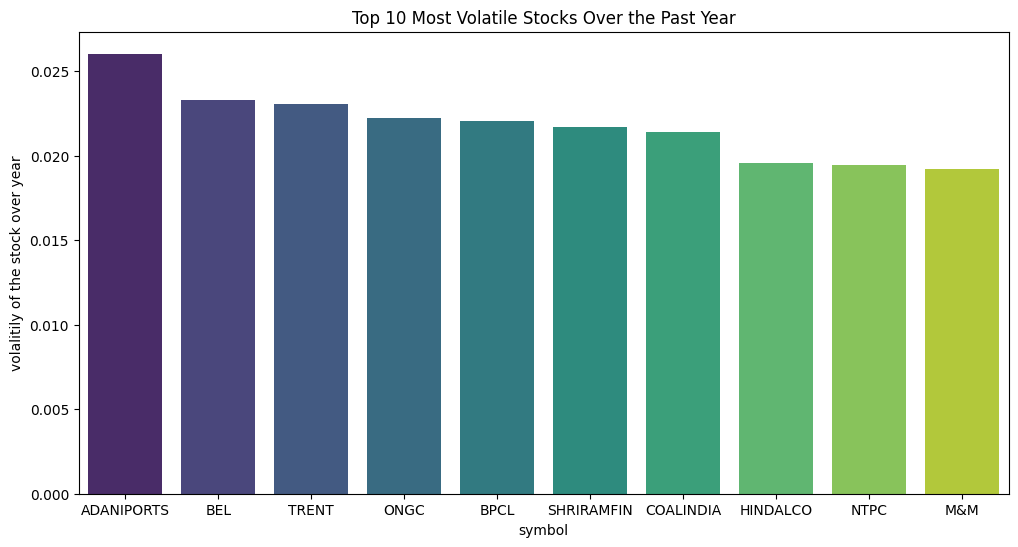

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x='symbol',y='volatility', data= top_10_volatile_stock,palette='viridis')
plt.title("Top 10 Most Volatile Stocks Over the Past Year")
plt.xlabel('symbol')
plt.ylabel('volalitily of the stock over year')
plt.show


#2. Cumulative Return Over Time

In [ ]:
combined_df['cumulative_return'] = (
    combined_df.groupby('symbol')['daily_returns']
    .apply(lambda x: (1 + x).cumprod())
    .reset_index(level=0, drop=True) 
    - 1
)

combined_df

close                 date     high      low    month     open  \
0      1913.84  2023-10-03 05:30:00  1931.32  1899.10  2023-10  1920.46   
1      1888.34  2023-10-04 05:30:00  1902.44  1869.62  2023-10  1898.45   
2      1882.67  2023-10-05 05:30:00  1901.44  1873.55  2023-10  1889.59   
3      1895.76  2023-10-06 05:30:00  1898.35  1882.52  2023-10  1882.62   
4      1881.52  2023-10-09 05:30:00  1889.39  1867.67  2023-10  1882.57   
...        ...                  ...      ...      ...      ...      ...   
13059  6860.65  2024-11-14 05:30:00  6908.00  6827.05  2024-11  6860.00   
13060  6741.90  2024-11-18 05:30:00  6874.45  6694.55  2024-11  6874.45   
13061  6686.90  2024-11-19 05:30:00  6796.90  6661.20  2024-11  6750.00   
13062  6742.50  2024-11-21 05:30:00  6761.95  6594.15  2024-11  6623.55   
13063  6935.10  2024-11-22 05:30:00  6950.30  6751.60  2024-11  6751.60   

       volume      symbol           company         sector  daily_returns  \
0      591326      GRASIM            GRASIM       TEXTILES            NaN   
1      687673      GRASIM            GRASIM       TEXTILES      -0.013324   
2      544715      GRASIM            GRASIM       TEXTILES      -0.003003   
3      399766      GRASIM            GRASIM       TEXTILES       0.006953   
4      344554      GRASIM            GRASIM       TEXTILES      -0.007511   
...       ...         ...               ...            ...            ...   
13059  192648  APOLLOHOSP  APOLLO HOSPITALS  MISCELLANEOUS       0.000262   
13060  268706  APOLLOHOSP  APOLLO HOSPITALS  MISCELLANEOUS      -0.017309   
13061  290018  APOLLOHOSP  APOLLO HOSPITALS  MISCELLANEOUS      -0.008158   
13062  258574  APOLLOHOSP  APOLLO HOSPITALS  MISCELLANEOUS       0.008315   
13063  498633  APOLLOHOSP  APOLLO HOSPITALS  MISCELLANEOUS       0.028565   

       cumulative_return  
0                    NaN  
1              -0.013324  
2              -0.016287  
3              -0.009447  
4              -0.016888  
...                  ...  
13059           0.340246  
13060           0.317047  
13061           0.306303  
13062           0.317165  
13063           0.354790  

[13064 rows x 12 columns]

In [42]:
final_cummulative_return = combined_df.groupby("symbol")['cumulative_return'].last().sort_values(ascending=False)
final_cummulative_return

symbol
TRENT         2.230926
BEL           1.017601
M&M           0.959770
BAJAJ-AUTO    0.890112
POWERGRID     0.688549
BPCL          0.674772
HEROMOTOCO    0.589767
SUNPHARMA     0.572824
HCLTECH       0.532574
NTPC          0.515133
EICHERMOT     0.487796
SHRIRAMFIN    0.482895
TECHM         0.436811
COALINDIA     0.418465
WIPRO         0.409915
ULTRACEMCO    0.369709
ADANIPORTS    0.367272
ICICIBANK     0.359194
HINDALCO      0.358683
GRASIM        0.357820
APOLLOHOSP    0.354790
SBIN          0.353429
ONGC          0.330444
INFY          0.326534
TATAMOTORS    0.274881
JSWSTEEL      0.268874
CIPLA         0.256764
TCS           0.207963
LT            0.172537
HDFCBANK      0.157521
SBILIFE       0.149097
TATASTEEL     0.115469
DRREDDY       0.111788
AXISBANK      0.097354
RELIANCE      0.091728
HDFCLIFE      0.086260
ITC           0.079363
MARUTI        0.069267
TITAN         0.035182
BAJAJFINSV    0.025496
KOTAKBANK     0.019918
NESTLEIND     0.007071
HINDUNILVR   -0.009579
BAJF

In [57]:
top_5_stock = final_cummulative_return.head(5).index
top_5_stock
top_5_data = combined_df[combined_df['symbol'].isin(top_5_stock)]
top_5_data



close                 date     high      low    month     open  \
852    2059.10  2023-10-03 05:30:00  2086.30  2052.00  2023-10  2074.30   
853    2022.30  2023-10-04 05:30:00  2055.95  2007.60  2023-10  2054.00   
854    2047.60  2023-10-05 05:30:00  2058.15  2022.30  2023-10  2022.95   
855    2072.10  2023-10-06 05:30:00  2091.90  2050.10  2023-10  2055.85   
856    2079.05  2023-10-09 05:30:00  2089.45  2032.40  2023-10  2035.00   
...        ...                  ...      ...      ...      ...      ...   
11355   280.95  2024-11-14 05:30:00   284.45   275.50  2024-11   282.00   
11356   278.05  2024-11-18 05:30:00   286.70   277.25  2024-11   283.00   
11357   279.00  2024-11-19 05:30:00   285.20   277.00  2024-11   280.00   
11358   275.45  2024-11-21 05:30:00   278.45   270.25  2024-11   278.45   
11359   280.85  2024-11-22 05:30:00   283.50   275.50  2024-11   276.00   

         volume symbol             company     sector  daily_returns  \
852      543387  TRENT               TRENT  RETAILING            NaN   
853      551771  TRENT               TRENT  RETAILING      -0.017872   
854      461744  TRENT               TRENT  RETAILING       0.012511   
855      444220  TRENT               TRENT  RETAILING       0.011965   
856      487722  TRENT               TRENT  RETAILING       0.003354   
...         ...    ...                 ...        ...            ...   
11355  20541591    BEL  BHARAT ELECTRONICS    DEFENCE      -0.002131   
11356  13000137    BEL  BHARAT ELECTRONICS    DEFENCE      -0.010322   
11357  13160982    BEL  BHARAT ELECTRONICS    DEFENCE       0.003417   
11358  14858108    BEL  BHARAT ELECTRONICS    DEFENCE      -0.012724   
11359  13268900    BEL  BHARAT ELECTRONICS    DEFENCE       0.019604   

       cumulative_return  
852                  NaN  
853            -0.017872  
854            -0.005585  
855             0.006313  
856             0.009689  
...                  ...  
11355           1.018319  
11356           0.997486  
11357           1.004310  
11358           0.978807  
11359           1.017601  

[1420 rows x 12 columns]

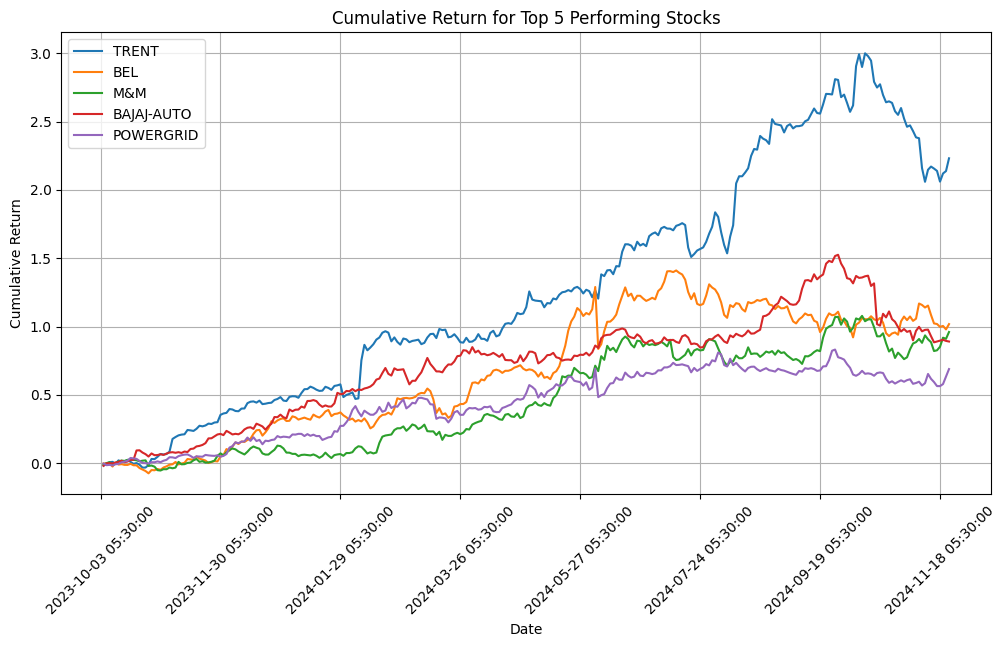

In [ ]:
#line chart

plt.figure(figsize=(12,6))
for symbol in top_5_stock:
    stock_data = top_5_data[top_5_data['symbol']==symbol]
    plt.plot(stock_data['date'],stock_data['cumulative_return'],label=symbol)

plt.title('Cumulative Return for Top 5 Performing Stocks')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))  # Limit the number of ticks
plt.grid(True)
plt.show()